# Example 1: Two points

## Harmonic Loss

In [1]:
import numpy as np
import torch
import copy
import matplotlib.pyplot as plt

seed = 0
np.random.seed(seed)
torch.manual_seed(seed)

class DistLayer(torch.nn.Linear):
    def __init__(self, in_features, out_features, n=1., eps=1e-6, bias=False):
        super(DistLayer, self).__init__(in_features, out_features, bias=bias)
        self.n = n
        self.eps = eps
        
    def forward(self, x, scale=False):
        # x: (B, N)
        # w: (V, N)
        # dist_sq: (B, V)
        n_embd = x.size(-1,)
        w = self.weight
        #w.data *= 0.
        wx = torch.einsum('bn,vn->bv', x, w) # (B, V)
        ww = torch.norm(w, dim=-1)**2 # (V,)
        xx = torch.norm(x, dim=-1)**2 # (B,)

        dist_sq = ww[None,:] + xx[:,None] - 2 * wx + self.eps
        dist_sq = dist_sq / torch.min(dist_sq, dim=-1, keepdim = True)[0]
        return (dist_sq)**(-self.n)

inputs = torch.tensor([[1.,1.], [-1.,-1.]])
labels = torch.tensor([0,1], dtype=torch.long)

distlayer = DistLayer(2,2)

lr = 1e-2
n_steps = 10000
optimizer = torch.optim.Adam(distlayer.parameters(), lr = lr)
ws = []
w_l2s = []
ls = []

for i in range(n_steps):
    optimizer.zero_grad()
    
    prob = distlayer(inputs)
    prob = prob/torch.sum(prob, dim=1, keepdim=True)
    logits = torch.log(prob)
    loss = torch.nn.functional.cross_entropy(logits, labels)
    loss.backward()
    optimizer.step()
    
    ws.append(copy.deepcopy(distlayer.weight.detach().numpy()))
    w_l2s.append(np.linalg.norm(distlayer.weight.detach().numpy()))
    ls.append(loss.item())
    
ls_h = np.array(ls)
w_l2s_h = np.array(w_l2s)

In [2]:
distlayer.weight

Parameter containing:
tensor([[ 1.0000,  1.0000],
        [-1.0000, -1.0000]], requires_grad=True)

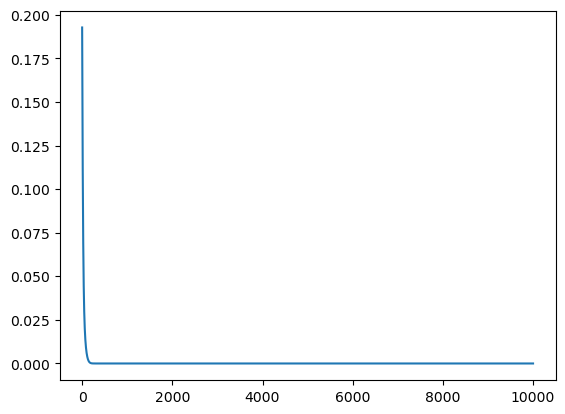

In [3]:
plt.plot(ls_h)

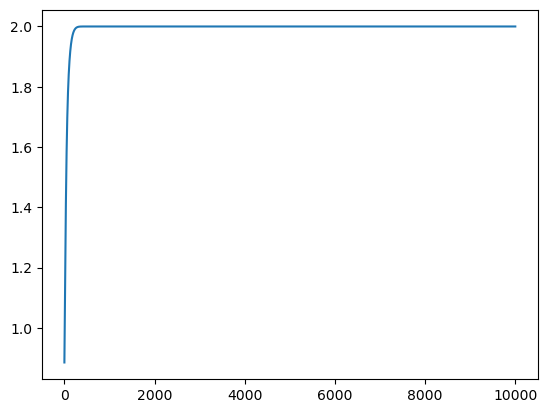

In [4]:
import matplotlib.pyplot as plt

plt.plot(w_l2s_h)

# Cross-entropy loss

In [5]:
import numpy as np
import torch
import copy
import matplotlib.pyplot as plt

seed = 0
np.random.seed(seed)
torch.manual_seed(seed)

inputs = torch.tensor([[1.,1.], [-1.,-1.]])
labels = torch.tensor([0,1], dtype=torch.long)

layer = torch.nn.Linear(2,2,bias=False)

lr = 1e-2
n_steps = 10000
optimizer = torch.optim.Adam(layer.parameters(), lr = lr)
ws = []
w_l2s = []
ls = []

for i in range(n_steps):
    optimizer.zero_grad()
    
    logits = layer(inputs)
    loss = torch.nn.functional.cross_entropy(logits, labels)
    loss.backward()
    optimizer.step()
    
    ws.append(copy.deepcopy(layer.weight.detach().numpy()))
    w_l2s.append(np.linalg.norm(layer.weight.detach().numpy()))
    ls.append(loss.item())
    
ls_s = np.array(ls)
w_l2s_s = np.array(w_l2s)

In [6]:
layer.weight

Parameter containing:
tensor([[ 2.8935,  3.2781],
        [-3.4808, -3.4192]], requires_grad=True)

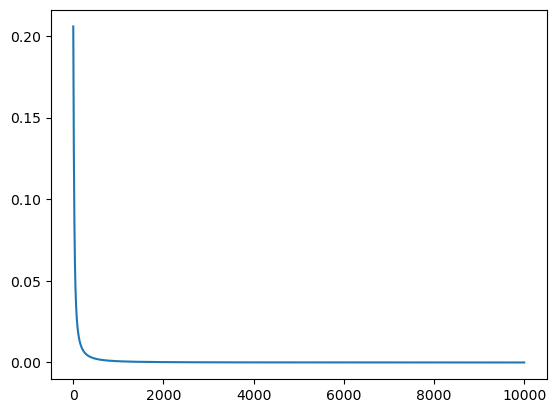

In [7]:
plt.plot(ls_s)

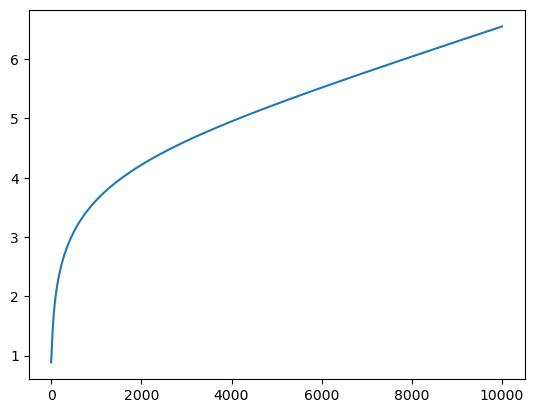

In [8]:
plt.plot(w_l2s_s)

Text(0, 0.5, 'weight norm $\\ell_2$')

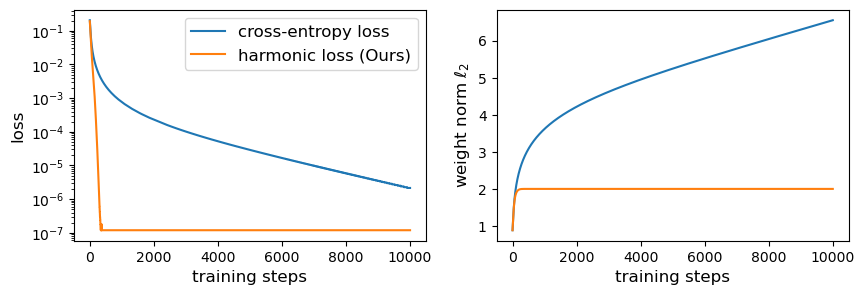

In [9]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
plt.plot(ls_s)
plt.plot(ls_h)
plt.yscale('log')
#plt.xscale('log')
plt.xlabel('training steps', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.legend(['cross-entropy loss', 'harmonic loss (Ours)'], loc='upper right', fontsize=12)

plt.subplot(1,2,2)
plt.plot(w_l2s_s)
plt.plot(w_l2s_h)
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('training steps', fontsize=12)
plt.ylabel(r'weight norm $\ell_2$', fontsize=12)
#plt.savefig('./toy1.pdf', bbox_inches='tight')

# Example 2: 5 Points

## Harmonic

In [10]:
import numpy as np
import torch
import copy
import matplotlib.pyplot as plt

seed = 0
np.random.seed(seed)
torch.manual_seed(seed)

class DistLayer(torch.nn.Linear):
    def __init__(self, in_features, out_features, n=1., eps=1e-6, bias=False):
        super(DistLayer, self).__init__(in_features, out_features, bias=bias)
        self.n = n
        self.eps = eps
        
    def forward(self, x, scale=False):
        # x: (B, N)
        # w: (V, N)
        # dist_sq: (B, V)
        n_embd = x.size(-1,)
        w = self.weight
        #w.data *= 0.
        wx = torch.einsum('bn,vn->bv', x, w) # (B, V)
        ww = torch.norm(w, dim=-1)**2 # (V,)
        xx = torch.norm(x, dim=-1)**2 # (B,)

        dist_sq = ww[None,:] + xx[:,None] - 2 * wx + self.eps
        dist_sq = dist_sq / torch.min(dist_sq, dim=-1, keepdim = True)[0]
        return (dist_sq)**(-self.n)

inputs = torch.tensor([[0.,1.], [0., -1,], [-1., 0.], [1., 0.], [0., 0.]])
labels = torch.tensor([0,1,2,3,4], dtype=torch.long)

distlayer = DistLayer(2,5)

lr = 1e-2
n_steps = 10000
optimizer = torch.optim.Adam(distlayer.parameters(), lr = lr)
ws = []
w_l2s = []
ls = []

for i in range(n_steps):
    optimizer.zero_grad()
    
    prob = distlayer(inputs)
    prob = prob/torch.sum(prob, dim=1, keepdim=True)
    logits = torch.log(prob)
    loss = torch.nn.functional.cross_entropy(logits, labels)
    loss.backward()
    optimizer.step()
    
    ws.append(copy.deepcopy(distlayer.weight.detach().numpy()))
    w_l2s.append(np.linalg.norm(distlayer.weight.detach().numpy()))
    ls.append(loss.item())
    
ls_h = np.array(ls)
w_l2s_h = np.array(w_l2s)

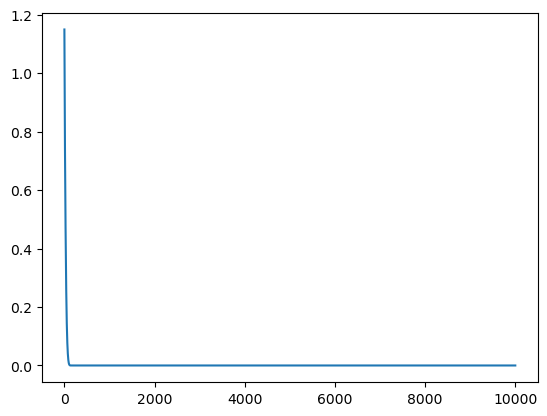

In [11]:
plt.plot(ls_h)

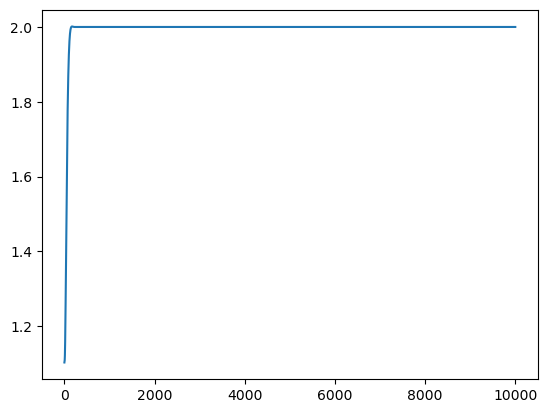

In [12]:
plt.plot(w_l2s_h)

In [13]:
distlayer.weight

Parameter containing:
tensor([[-2.2016e-10,  1.0000e+00],
        [-7.6735e-13, -1.0000e+00],
        [-1.0000e+00, -2.5472e-09],
        [ 1.0000e+00, -1.8103e-14],
        [ 9.8643e-09,  1.0610e-14]], requires_grad=True)

## Cross-entropy loss

In [14]:
import numpy as np
import torch
import copy
import matplotlib.pyplot as plt

seed = 0
np.random.seed(seed)
torch.manual_seed(seed)

inputs = torch.tensor([[0.,1.], [0., -1,], [-1., 0.], [1., 0.], [0., 0.]])
labels = torch.tensor([0,1,2,3,4], dtype=torch.long)
layer = torch.nn.Linear(2,5,bias=False)

lr = 1e-2
n_steps = 10000
optimizer = torch.optim.Adam(layer.parameters(), lr = lr)
ws = []
w_l2s = []
ls = []

for i in range(n_steps):
    optimizer.zero_grad()
    
    logits = layer(inputs)
    loss = torch.nn.functional.cross_entropy(logits, labels)
    loss.backward()
    optimizer.step()
    
    ws.append(copy.deepcopy(layer.weight.detach().numpy()))
    w_l2s.append(np.linalg.norm(layer.weight.detach().numpy()))
    ls.append(loss.item())
    
ls_s = np.array(ls)
w_l2s_s = np.array(w_l2s)

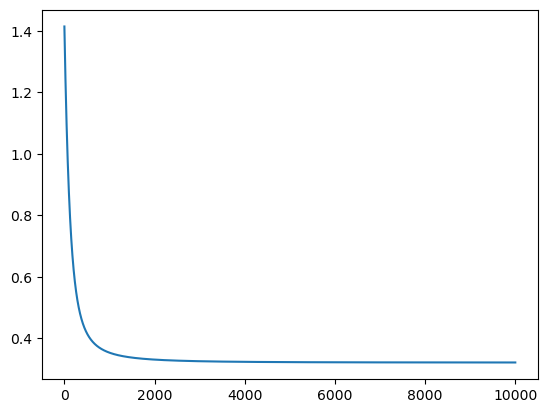

In [15]:
plt.plot(ls_s)

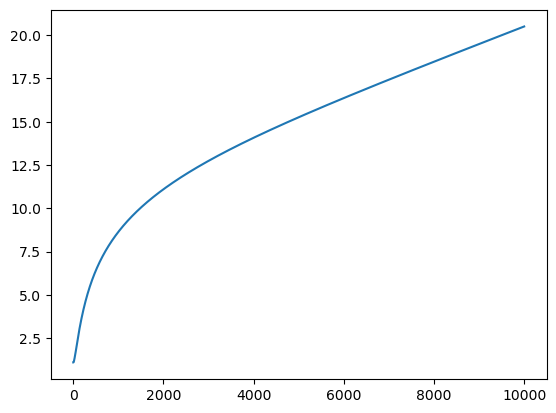

In [16]:
plt.plot(w_l2s_s)

In [17]:
layer.weight

Parameter containing:
tensor([[ -0.0362,   9.9650],
        [ -0.0367, -10.7058],
        [-10.1824,  -0.3703],
        [ 10.1105,  -0.3666],
        [ -0.0361,  -0.3703]], requires_grad=True)

Text(0, 0.5, 'weight norm $\\ell_2$')

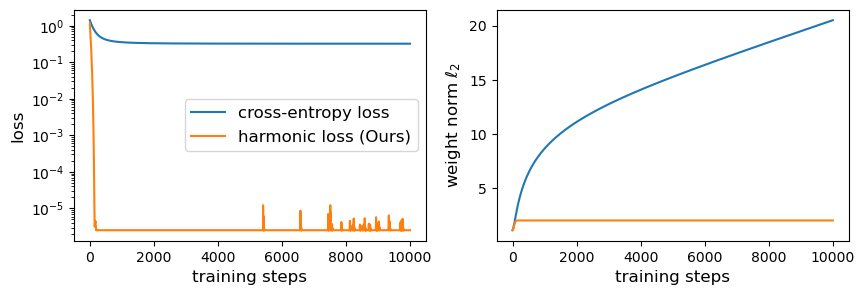

In [18]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
plt.plot(ls_s)
plt.plot(ls_h)
plt.yscale('log')
#plt.xscale('log')
plt.xlabel('training steps', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.legend(['cross-entropy loss', 'harmonic loss (Ours)'], loc='center right', fontsize=12)

plt.subplot(1,2,2)
plt.plot(w_l2s_s)
plt.plot(w_l2s_h)
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('training steps', fontsize=12)
plt.ylabel(r'weight norm $\ell_2$', fontsize=12)
#plt.savefig('./toy2.pdf', bbox_inches='tight')